<h3>Linear regression</h3>
<p>We start by loading the red wine's data</p>

In [7]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
#X = data[:,:11]
q = data[:,11]

In [8]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 'winequality-white.csv')
import numpy as np
with open('winequality-white.csv') as fw:
    lines_white = (line for line in fw)
    data_white = np.loadtxt(lines_white, delimiter=';', skiprows=1)
q_white = data_white[:,11]

<h4>Plotting</h4>
<p>It's useful to start with a plot. Histogram of the quality, for the red wine data.</p>

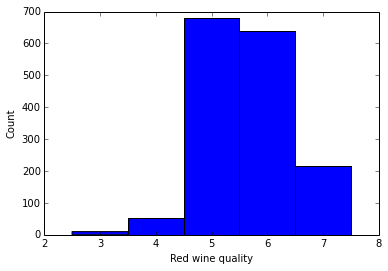

In [9]:
%matplotlib inline
import pylab as plt
plt.hist(q, bins=np.arange(q.min(), q.max()+1), align='left')
plt.xlabel('Red wine quality')
plt.ylabel('Count')

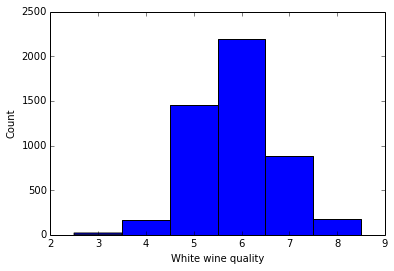

In [10]:
%matplotlib inline
import pylab as plt
plt.hist(q_white, bins=np.arange(q_white.min(), q_white.max()+1), align='left')
plt.xlabel('White wine quality')
plt.ylabel('Count')

Linear regression with minimised square loss. Mean Square Error = 0.46663898983


0.46663898982954394

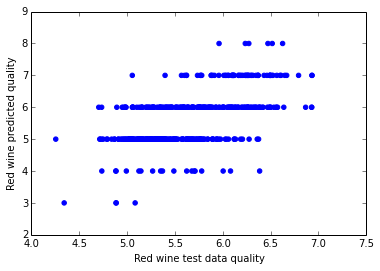

In [28]:
def fitLinearModelAndGetSquareError(showPlot):
    N = data.shape[0] #get tupple (numRows, numCols)
    np.random.shuffle(data)

    train = data[:int(N*0.7)]
    test = data[int(N*0.7):]
    X_train = train[:,:11]
    X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
    q_train = train[:,11]
    #data is now splitted into train and test

    from numpy.linalg import inv
    XtX = np.dot(X_train.T, X_train) 
    XtXI = inv(XtX)
    XtXIXt = np.dot(XtXI, X_train.T)
    wbar = np.dot(XtXIXt, q_train)
    #optimal values for the wbar are now found. For these values we are minimizing the Loss agianst the train data


    #now plotting the new fitted model
    X_test = test[:,:11]
    X_test = np.c_[np.ones(test.shape[0]), X_test]
    q_test = test[:,11]
    f_test = np.dot(X_test, wbar)

    meanSquareError = ((q_test-f_test)**2).mean()
    if showPlot:
        print "Linear regression with minimised square loss. Mean Square Error =", meanSquareError
        plt.scatter(f_test,q_test, color='blue')
        plt.xlabel('Red wine test data quality')
        plt.ylabel('Red wine predicted quality')
    return meanSquareError
fitLinearModelAndGetSquareError(True)

[0.446111534239583, 0.40042609402069002, 0.4566228061821479, 0.4287832915987399, 0.39729901634027892, 0.45863929935530928, 0.42195075834409435, 0.44923884896830285, 0.48303177056870922, 0.41872068530438528, 0.42417090048791883, 0.42054213770165766, 0.39122560182007138, 0.44977852038309274, 0.45088961253873461, 0.39106923303813623, 0.4430257886999821, 0.45422972038074871, 0.45865218026464921, 0.40486893867249313, 0.37831959574294849, 0.42567856270925986, 0.47895650632574749, 0.4757927193832811, 0.49370863596495262, 0.43396672410228043, 0.4060460023366001, 0.45754960829456714, 0.46153993995435683, 0.42350296421044303, 0.42288170928153779, 0.43081551164797971, 0.4240117099296129, 0.46679462430590962, 0.44215389777798086, 0.39993494584139527, 0.47123919080790577, 0.40993814040664456, 0.42287856562442178, 0.42475659564154378, 0.39048547429205283, 0.40840236684292303, 0.39771796651259628, 0.4360797852275019, 0.43370711074250407, 0.42220631374864276, 0.44021188285206814, 0.42297577086381033, 

(array([  1.,   7.,   4.,  12.,   6.,   5.,   8.,   2.,   3.,   2.]),
 array([ 0.3783196 ,  0.3898585 ,  0.4013974 ,  0.41293631,  0.42447521,
         0.43601412,  0.44755302,  0.45909192,  0.47063083,  0.48216973,
         0.49370864]),
 <a list of 10 Patch objects>)

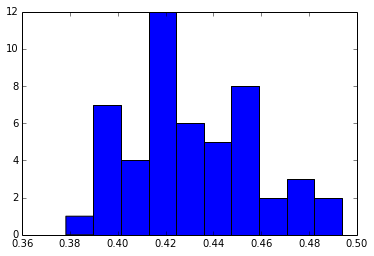

In [30]:
errors = []
for i in range(50):
    errors += [fitLinearModelAndGetSquareError(False)]
print errors
plt.hist(errors)